<a href="https://colab.research.google.com/github/Murdocksilva/Data-Science---Coder-House/blob/main/Data_Science_III_Alfonso_Marrero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Entrega final - Data Science III - CODERHOUSE
Alfonso Marreero
#NLP
##Titulo del proyecto
#**"La Técnica Más Eficaz para Tomar Notas y Recordar lo que Lees"**

En este proyecto se realiza un análisis de texto aplicado al ensayo Ricardo Sanchez titulado "La Técnica Más Eficaz para Tomar Notas y Recordar lo que Lees".

tiene como objetivo realizar un análisis del ensayo usando técnicas de minería de texto.



###Carga de datos

In [50]:
#instalo las dependencias que vamos a utilizar.
!pip install requests beautifulsoup4 spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 43.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [51]:
import requests
from bs4 import BeautifulSoup
import spacy

# URL del artículo
url = "https://medium.com/sin-agenda/la-t%C3%A1cnica-m%C3%A1s-eficaz-para-tomar-notas-y-recordar-lo-que-lees-cf52007901ee"


In [52]:
# Cargo el modelo de spaCy para español
nlp = spacy.load('es_core_news_sm')

# Realizo la solicitud GET
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})

if response.status_code == 200:

    soup = BeautifulSoup(response.text, 'html.parser')

    # Extraigo todo el texto de las etiquetas de párrafo
    paragraphs = soup.find_all('p')

    # Filtro párrafos relevantes
    article_paragraphs = [p.get_text() for p in paragraphs if p.get_text().strip()]

    # Uno luego los párrafos
    article_text = ' '.join(article_paragraphs)

    # Buscamos las frases
    frase_inicial = "Les quiero compartir un proceso"
    frase_final = "y otras cosas que considero importantes."

    start_index = article_text.find(frase_inicial)
    end_index = article_text.find(frase_final) + len(frase_final) if frase_final in article_text else len(article_text)

    if start_index != -1:
        texto_relevante = article_text[start_index:end_index]

        print("Texto relevante encontrado:")
        print(texto_relevante)

        # Tokenizo oraciones con spaCy
        doc = nlp(texto_relevante)
        tokenized_oracion = [sent.text.strip() for sent in doc.sents]

        # Imprimo oraciones tokenizadas
        print("\nOraciones tokenizadas:")
        for oracion in tokenized_oracion:
            print(oracion)

        # Tokenización de palabras
        tokenized_palabras = [token.text for token in nlp(texto_relevante)]
        print("\nPalabras tokenizadas:")
        print(tokenized_palabras)

        # Eliminar stopwords
        stopwords = [token.text for token in nlp(texto_relevante) if not token.is_stop]
        print("\nPalabras sin stopwords:")
        print(stopwords)

    else:
        print("No se encontraron las frases especificadas en el artículo.")
else:
    print(f"Fallo al recuperar la página web. Código de estado: {response.status_code}")

Texto relevante encontrado:
Les quiero compartir un proceso que utilizo para ayudarme a retener lo que leo. Por mucho tiempo, leía libros, revistas, y artículos en Internet pero aunque muchas veces trataba de retener algunos de estos datos, la mayoría de las veces me olvidaba de lo que leía en un par de días, a veces en un par de horas. Esto no es un gran problema cuando leo ficción, pero lo es cuando leo no ficción, ya que para mi el motivo de leer este genero es para aprender y entender mejor las cosas sobre areas en las que estoy interesado. Mi primer intento para retener la información interesante que leo en un articulo o en un libro, fue utilizando el app de Readwise. Estás aplicación te ayuda a guardar todas las cosas que encuentras en linea y el text que subrayas en tu eReader. Pero el problema persistió, ya que mi conocimiento no se expandía, solo la cantidad de información en mi cuenta de Readwise. En el libro de “ Crea tu segundo cerebro”, Tiago Forte comparte varios tips par

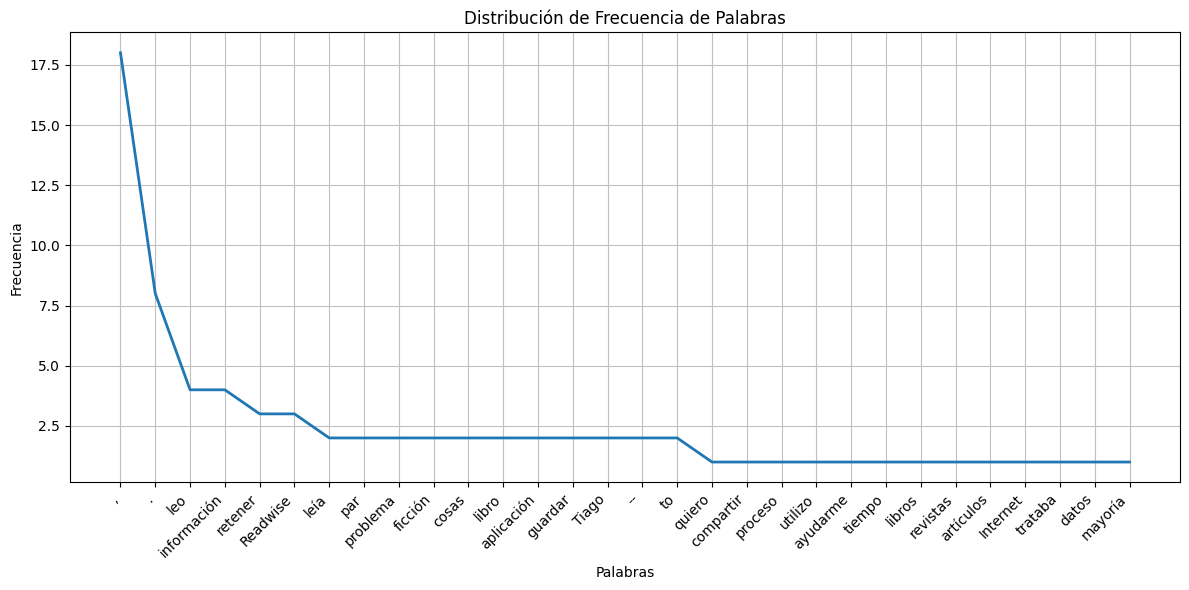

In [53]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt


tokenized_palabras = [token.text for token in nlp(texto_relevante) if not token.is_stop]

# Creo la distribución de frecuencia
fdist = FreqDist(tokenized_palabras)

# Grafico las 30 palabras más frecuentes
plt.figure(figsize=(12,6))
fdist.plot(30, cumulative=False)
plt.title('Distribución de Frecuencia de Palabras')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
from nltk.corpus import stopwords

# stopwords en español
stop_words = set(stopwords.words('spanish'))
print(stop_words)

{'estaremos', 'desde', 'habría', 'ya', 'sus', 'estuvieran', 'hubieran', 'serás', 'habré', 'esa', 'algo', 'tendremos', 'suya', 'tuve', 'sintiendo', 'y', 'mío', 'más', 'estas', 'en', 'tendrán', 'tenían', 'nos', 'nosotras', 'con', 'estados', 'estuvieses', 'están', 'estuvierais', 'estás', 'fuesen', 'he', 'estabas', 'estuvieseis', 'suyos', 'seas', 'de', 'los', 'seréis', 'estuviese', 'tened', 'fuisteis', 'estéis', 'hayan', 'hayáis', 'les', 'estuviera', 'habrán', 'vuestro', 'éramos', 'erais', 'tuyos', 'también', 'tuya', 'todo', 'habéis', 'fueron', 'cual', 'o', 'habrá', 'estarías', 'tenemos', 'este', 'tendré', 'habían', 'serán', 'tu', 'estarás', 'tiene', 'eran', 'tus', 'seáis', 'tenga', 'tuvieses', 'estada', 'hemos', 'habido', 'habréis', 'vosotras', 'estuviésemos', 'tuvimos', 'era', 'sentidas', 'habíamos', 'tenía', 'eras', 'habida', 'estará', 'son', 'ellas', 'tuvo', 'del', 'eres', 'estando', 'habrían', 'hubo', 'hubisteis', 'hubimos', 'hayamos', 'esté', 'cuando', 'tienen', 'serías', 'tenido', '

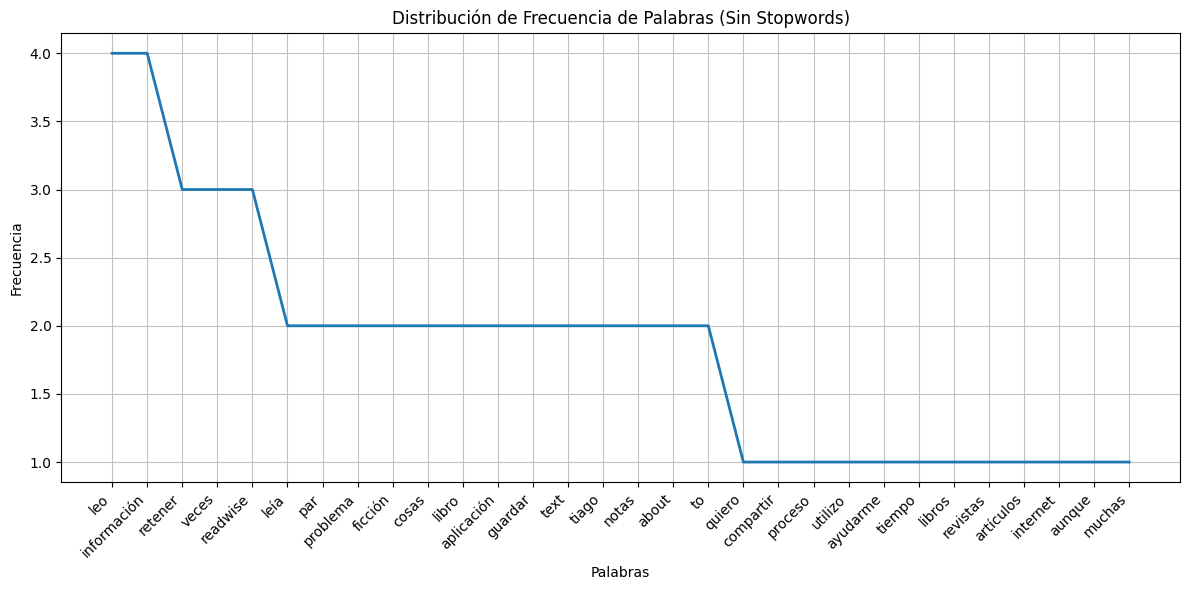

Las 10 palabras más frecuentes:
[('leo', 4), ('información', 4), ('retener', 3), ('veces', 3), ('readwise', 3), ('leía', 2), ('par', 2), ('problema', 2), ('ficción', 2), ('cosas', 2)]


In [55]:
# Palabras tokenizadas
tokenized_palabras = [token.text for token in nlp(texto_relevante)]

# Filtro de stopwords y símbolos
tokenized_palabra_stopwords = [
    word.lower() for word in tokenized_palabras
    if word.lower() not in stop_words and word.isalpha()
]

# Calculo la distribución de frecuencia
fdist_stopwords = FreqDist(tokenized_palabra_stopwords)

# Grafico la distribución de frecuencia del top 30 palabras más comunes
plt.figure(figsize=(12,6))
fdist_stopwords.plot(30, cumulative=False)
plt.title('Distribución de Frecuencia de Palabras (Sin Stopwords)')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Imprimo las palabras más comunes
print("Las 10 palabras más frecuentes:")
print(fdist_stopwords.most_common(10))

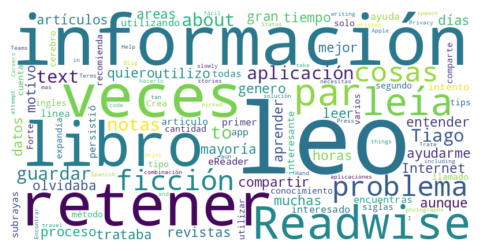

In [56]:
# Creo nube de palabras
wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color = 'white',
    stopwords = stop_words
).generate(texto_relevante)

plt.figure(figsize=(8, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [57]:
# Función para calculo n-grams
def get_ngrams(text, n):
    n_grams = ngrams(text, n)
    return Counter(n_grams)

# Calcular bigrams, trigrams y 4-grams
bigrams = get_ngrams(tokenized_palabra_stopwords, 2)
trigrams = get_ngrams(tokenized_palabra_stopwords, 3)
fourgrams = get_ngrams(tokenized_palabra_stopwords, 4)

# Imprimo los n-grams más comunes
print("Bigrams más comunes:")
print(bigrams.most_common(10))

print("\nTrigrams más comunes:")
print(trigrams.most_common(10))

print("\n4-grams más comunes:")
print(fourgrams.most_common(10))

Bigrams más comunes:
[(('leo', 'ficción'), 2), (('readwise', 'aplicación'), 2), (('quiero', 'compartir'), 1), (('compartir', 'proceso'), 1), (('proceso', 'utilizo'), 1), (('utilizo', 'ayudarme'), 1), (('ayudarme', 'retener'), 1), (('retener', 'leo'), 1), (('leo', 'tiempo'), 1), (('tiempo', 'leía'), 1)]

Trigrams más comunes:
[(('quiero', 'compartir', 'proceso'), 1), (('compartir', 'proceso', 'utilizo'), 1), (('proceso', 'utilizo', 'ayudarme'), 1), (('utilizo', 'ayudarme', 'retener'), 1), (('ayudarme', 'retener', 'leo'), 1), (('retener', 'leo', 'tiempo'), 1), (('leo', 'tiempo', 'leía'), 1), (('tiempo', 'leía', 'libros'), 1), (('leía', 'libros', 'revistas'), 1), (('libros', 'revistas', 'artículos'), 1)]

4-grams más comunes:
[(('quiero', 'compartir', 'proceso', 'utilizo'), 1), (('compartir', 'proceso', 'utilizo', 'ayudarme'), 1), (('proceso', 'utilizo', 'ayudarme', 'retener'), 1), (('utilizo', 'ayudarme', 'retener', 'leo'), 1), (('ayudarme', 'retener', 'leo', 'tiempo'), 1), (('retener', 

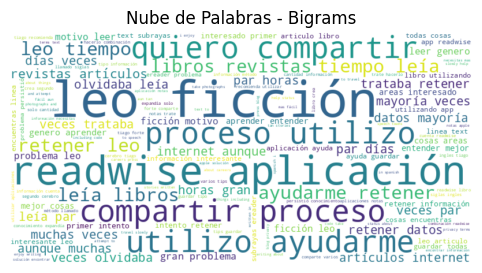

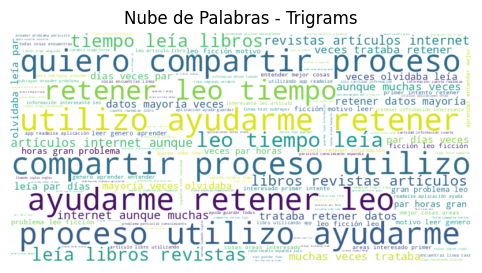

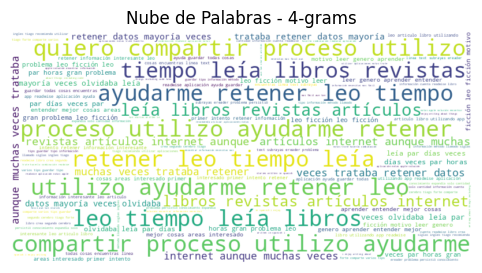

In [58]:
def generate_wordcloud(ngrams_counter, title):
    ngrams_dict = {' '.join(ngram): count for ngram, count in ngrams_counter.items()}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngrams_dict)

    plt.figure(figsize=(8, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Nubes de palabras para cada n-grama
generate_wordcloud(bigrams, 'Nube de Palabras - Bigrams')
generate_wordcloud(trigrams, 'Nube de Palabras - Trigrams')
generate_wordcloud(fourgrams, 'Nube de Palabras - 4-grams')

**#Conclusión **

###Implementé metodologías de procesamiento de lenguaje natural para diseccionar el contenido del ensayo estudiado. Utilizando algoritmos de extracción de características, identificamos y catalogamos los n-gramas más relevantes. El resultado: un mapa de palabras clave y combinaciones que nos ayudan a entender de verdad qué dice el documento y cuáles son sus ideas principales.

gracias
